<a href="https://colab.research.google.com/github/RishikaVerma21/Play-Store-Review-Analysis/blob/main/Play_store_analysis_and_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introduction :**



 **Play store data:**

*This contains data on the Google Play applications. It has 10,841 rows and 13 columns of data which has following columns:*

**App:** The name of apps given

**App Category:** This column tells us the category of the app. This could be beauty, business, medical,art and design entertainment, education...etc.

**Rating:** This column tells us how much rating that app has got. Users rate the app out of 5, with 1 being the lowest rating and 5 being the highest.

**Reviews:** This column tells us the number of user given reviews for each app.

**Size:** This column tells us memory size needed to install the application.

**Installs:** This column tells us the number of times each application has been installed by the users.

**Type:** This column tells us whether the app is free or a paid app.

**Price:** This column tells us the price of the app.

**Content Rating:** This column tells us the audience for the app. They may be for teens, mature audience, etc

**Genres:** This column intends sub-category for each app. 

**Last Updated:** This column tells us the release date of the  app.

**Current Ver:** This column tells us the current version of app.

**Android Ver:** This column tells us the oldest version of Android O/S supported by the app.

**User Reviews :**

*This file contains the result of the sentiment analysis. This data contains 64,295 rows and 5 columns. What these columns says are given below*

**App:** Name of the app.

**Translated_Review:** This column tells us either the original review in english, or a translated version if the orignal review is in another language.

**Sentiment:** This column tells us the result of the sentiment analysis conducted on a review and the value may be either Positive or Neutral or Negative.

**Sentiment_Polarity:** This column tells us the value indicating the positivity or negativity of the sentiment. The values ranges from -1 (most negative) to 1 (most positive). The sentiment polarity of an element defines the orientation of the expressed sentiment, i.e. it tells us whether the text expresses positive, negative or neutral sentiment of the user about the entity in consideration.

**Sentiment_Subjectivity:** This column tells us the value from 0 to 1 indicating the subjectivity of the review. Lower values indicate the review is based on factual information while the higher values indicate the review is based on personal or public opinions or judgements.

In [5]:
# Import the necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")

In [6]:

from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from matplotlib import rcParams     


import seaborn as sns              # To make plots with seaborn
color = sns.color_palette()

import warnings
warnings.filterwarnings('ignore')

**Now we will import csv file**

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
path  = "/content/drive/MyDrive/Capstone Projects/Project 1 : Play Store review analysis/"
 
play_store_df = pd.read_csv(path + "Play Store Data.csv")
user_review_df = pd.read_csv(path + "User Reviews.csv")

In [11]:
# This gives us the information of our data set
play_store_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [13]:
# This code will give first 5 rows of the data set
play_store_df.sample(5) 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6180,Baldur's Gate: Enhanced Edition,FAMILY,4.5,20101,7.8M,"100,000+",Paid,$9.99,Teen,Role Playing,"October 2, 2015",1.3,3.0 and up
6314,The Daily BJ,HEALTH_AND_FITNESS,4.8,38,24M,500+,Free,0,Everyone,Health & Fitness,"July 10, 2018",1.1,5.0 and up
4310,"K-Spapp, the K-Space app",FAMILY,4.8,39,3.6M,"1,000+",Free,0,Everyone,Education,"February 9, 2017",1.53,4.0.3 and up
3035,Golf GPS Rangefinder: Golf Pad,SPORTS,4.6,13098,Varies with device,"1,000,000+",Free,0,Everyone,Sports,"July 28, 2018",Varies with device,Varies with device
5554,Assemblr - Create 3D Models (Sandbox AR),FAMILY,3.8,1745,Varies with device,"1,000,000+",Free,0,Everyone,Simulation,"July 17, 2018",2.25,5.0 and up


**Let's Check the shape of data**

In [14]:
print(play_store_df.shape)
print(user_review_df.shape)

(10841, 13)
(64295, 5)


#**DATA CLEANING**

In [15]:
# First we need to find missing value in our data
print('Missing value are as follows:')

play_store_df.isnull().sum()

Missing value are as follows:


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

**Drop NaNs and duplicates from existing dataframe**

In [16]:
# Delete duplicates from App column.
play_store_df.drop_duplicates(subset=['App'],keep='first', inplace=True, ignore_index=True)

# check data remove or not
play_store_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [17]:
play_store_df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [18]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9660 entries, 0 to 9659
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 981.2+ KB


In [51]:
# This code will give first 10 rows of the data set
play_store_df.sample(10) 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3692,T-Mobile Visual Voicemail,TOOLS,3.6,41502,Varies with device,"50,000,000+",Free,0,Everyone,Tools,"July 31, 2018",Varies with device,Varies with device
9352,Fairy Kingdom: World of Magic and Farming,FAMILY,4.4,129542,63M,"1,000,000+",Free,0,Everyone,Strategy;Creativity,"July 23, 2018",2.4.9,4.0.3 and up
5304,BJ Bridge Free (2018),GAME,3.9,20,4.8M,"10,000+",Free,0,Everyone,Card,"May 21, 2018",6.2-lite,4.0 and up
8413,El Pollo Loco - Loco Rewards,FOOD_AND_DRINK,4.0,848,25M,"100,000+",Free,0,Everyone,Food & Drink,"February 23, 2018",2.1,4.1 and up
7109,The Zueira's Voice,TOOLS,4.7,136540,3.1M,"1,000,000+",Free,0,Everyone,Tools,"July 10, 2018",4.75,4.0.3 and up
726,Ziggo GO,ENTERTAINMENT,4.1,29690,78M,"1,000,000+",Free,0,Teen,Entertainment,"August 3, 2018",2.3.34 Prod,4.3 and up
5301,BJ's Bingo & Gaming Casino,GAME,4.5,501,65M,"10,000+",Free,0,Teen,Casino,"July 26, 2018",5.0.1.3,4.3 and up
4270,AJ Jump: Animal Jam Kangaroos!,GAME,4.4,2975,42M,"50,000+",Paid,$1.99,Everyone,Arcade,"March 7, 2016",1.6,4.0 and up
9222,PBS KIDS Games,FAMILY,4.3,12919,94M,"1,000,000+",Free,0,Everyone,Educational;Education,"June 6, 2018",1.15.2,4.4 and up
5708,BS Play,FAMILY,3.7,56,1.5M,"5,000+",Free,0,Everyone,Education,"March 4, 2015",1.1.2,4.0 and up


#**CHECKING**

In [23]:
# Here we will replace null values with median in the rating column.
median_val =round(play_store_df['Rating'].median(),2)

#median_val
play_store_df['Rating'].fillna(median_val,inplace=True)


play_store_df['Current Ver'].fillna(play_store_df['Current Ver'].mode()[0],inplace=True)
play_store_df['Android Ver'].fillna(play_store_df['Android Ver'].mode()[0],inplace=True)
play_store_df['Content Rating'].fillna(play_store_df['Content Rating'].mode()[0],inplace = True)

# Finding the mod values of column and replacing it null values.

mode_val_type = play_store_df['Type'].mode()[0]
mode_val_type

'Free'

In [24]:
play_store_df['Type'].fillna(mode_val_type,inplace=True)

In [25]:
play_store_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [26]:
# Here you can notice the difference

play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9660 entries, 0 to 9659
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          9660 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9660 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9660 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9660 non-null   object 
 12  Android Ver     9660 non-null   object 
dtypes: float64(1), object(12)
memory usage: 981.2+ KB


**Checking outliers**

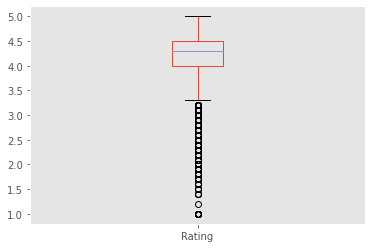

In [68]:
play_store_df.boxplot(column='Rating')
plt.grid(False)